In [62]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from TSP import compute_distance_matrix, visualize
from GA import solve

In [63]:
def analyze_ga(
    csv_file: str,
    population_size: int = 100,
    generations: int = 200,
    mutation_rate: float = 0.01,
    mutation_algorithm: str = 'swap',
    crossover_algorithm: str = 'single_point',
    selection_algorithm: str = 'tournament',
    show_fitness_plot: bool = True,
    show_route_plot: bool = True
) -> dict:
    """
    Run GA on a CSV of city coordinates and display results.
    Returns a dict with best_distance, best_route, fitness_history, time_sec.
    """
    # Load locations
    df = pd.read_csv(csv_file)
    if 'lat' in df.columns and 'lon' in df.columns:
        locations = list(zip(df['lat'], df['lon']))
    else:
        arr = df.values
        locations = [(float(r[1]), float(r[2])) for r in arr[1:]]

    # Compute distance matrix
    dist_mat = compute_distance_matrix(locations)

    # Run GA
    t0 = time.time()
    best_distance, best_route, fitness_history = solve(
        dist_mat,
        population_size=population_size,
        generations=generations,
        mutation_rate=mutation_rate,
        mutation_algorithm=mutation_algorithm,
        crossover_algorithm=crossover_algorithm,
        selection_algorithm=selection_algorithm
    )
    elapsed = time.time() - t0

    # Print results
    print(f"\n--- RESULTS for {csv_file} ---")
    print(f"Best route : {best_route}")
    print(f"Total dist : {best_distance:.2f} km")
    print(f"Time elapsed: {elapsed:.2f} s")

    # Plot fitness curve
    if show_fitness_plot:
        # plt.figure(figsize=(6,4))
        # plt.plot(fitness_history, marker='o', linestyle='-')
        # plt.title(f"Fitness over generations (population_size={population_size}, generations={generations})")
        # plt.xlabel("Generation")
        # plt.ylabel("Best fitness")
        # plt.grid(True)
        # plt.show()

        plt.figure(figsize=(8, 5))
        plt.plot(fitness_history, marker=None, linestyle='-')
        plt.title('Fitness over generations')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plot route
    # if show_route_plot:
    #     visualize(locations, [c-1 for c in best_route], title=f"Route for {csv_file}")

    # Return dict
    return {
        'best_distance':     best_distance,
        'best_route':        best_route,
        'fitness_history':   fitness_history,
        'time_sec':          elapsed
    }


# MẶC ĐỊNH
- THUẬT TOÁN
    - SELECTION = TOURNAMENT
    - CROSSOVER = SINGLE POINT
    - MUTATION = SWAP
- THAM SỐ
    - POPULATION SIZE = 100
    - GENERATIONS = 200
    - MUTATION RATE = 0.01

## TRƯỜNG HỢP 1: NHÓM NHỎ (3-6 THÀNH PHỐ)

1. Bộ ThreeProvinces.csv (3 thành phố)


--- RESULTS for ../data/1_ThreeProvinces.csv ---
Best route : [1, 3, 2, 1]
Total dist : 209.51 km
Time elapsed: 0.13 s


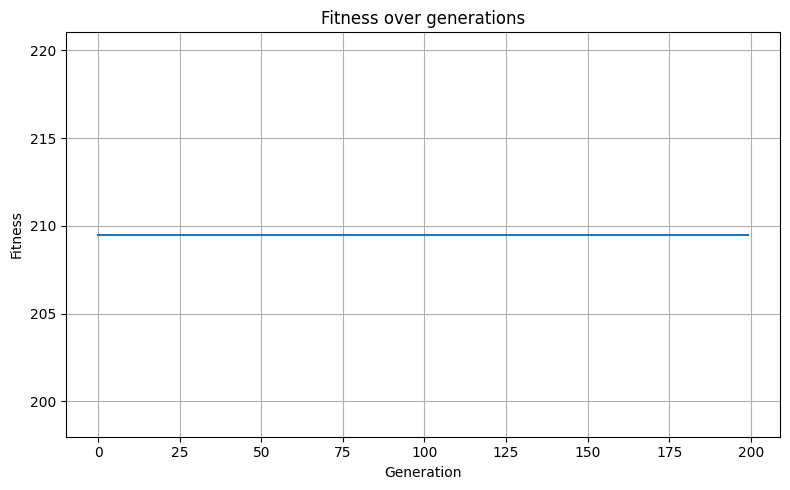

In [64]:
resultN1 = analyze_ga(
    "../data/1_ThreeProvinces.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)


2. SouthEast.csv (6 thành phố)


--- RESULTS for ../data/2_SouthEast.csv ---
Best route : [1, 6, 5, 3, 2, 4, 1]
Total dist : 426.02 km
Time elapsed: 0.15 s


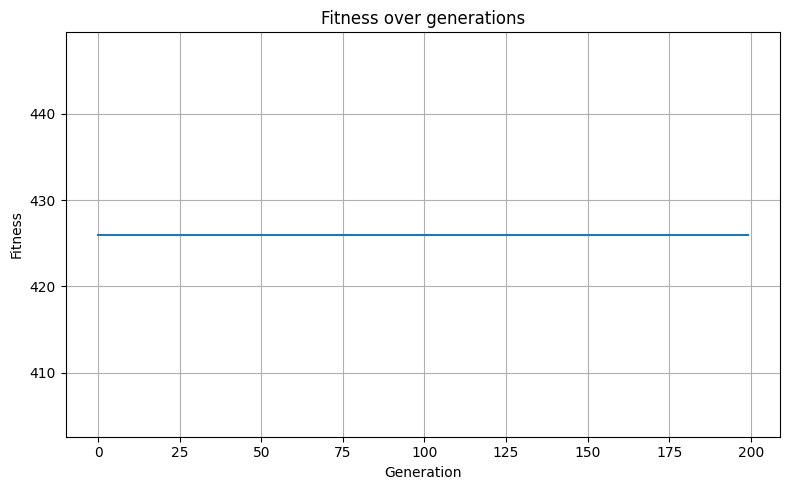

In [65]:
resulN2 = analyze_ga(
    "../data/2_SouthEast.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)


**Kết luận:** Với bộ dữ liệu nhóm nhỏ có sự hội tụ nhanh ở các thể hệ đầu, vì thế chỉ cần dùng các thông số mặc định để tìm ra lời giải tối ưu.

## TRƯỜNG HỢP 2: NHÓM TRUNG BÌNH (13-25 THÀNH PHỐ)

### CentralRegion.csv (19 thành phố)


--- RESULTS for ../data/5_CentralRegion.csv ---
Best route : [1, 2, 3, 4, 5, 6, 19, 7, 14, 8, 9, 10, 11, 12, 13, 18, 17, 16, 15, 1]
Total dist : 2392.11 km
Time elapsed: 0.35 s


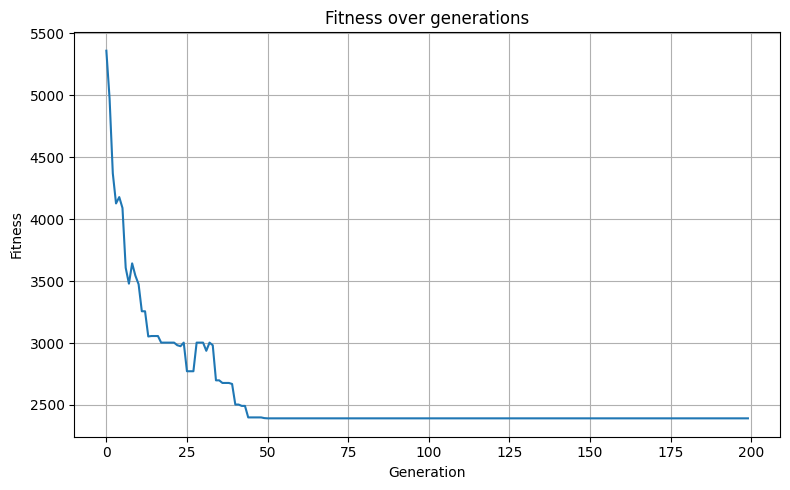

In [73]:
resultT2 = analyze_ga(
    "../data/5_CentralRegion.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)

    Điều chỉnh tham số


--- RESULTS for ../data/5_CentralRegion.csv ---
Best route : [1, 2, 3, 4, 5, 6, 19, 7, 8, 9, 10, 11, 12, 13, 18, 17, 16, 15, 14, 1]
Total dist : 2300.63 km
Time elapsed: 1.44 s


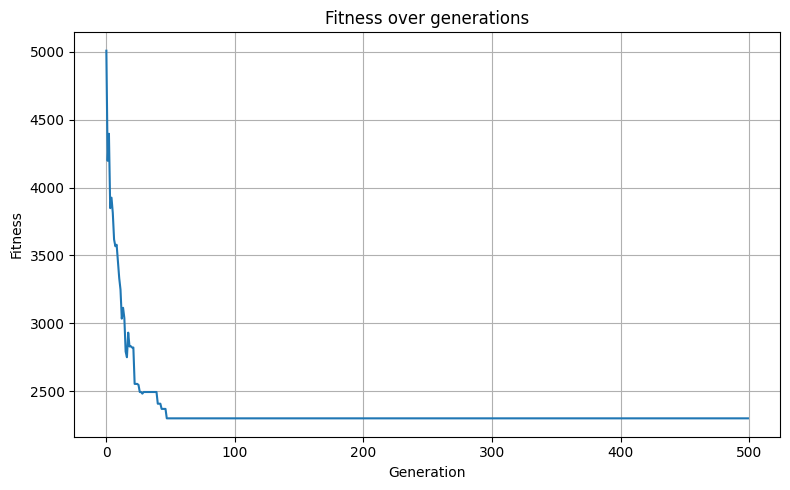

In [83]:
resultT22 = analyze_ga(
    "../data/5_CentralRegion.csv",
    population_size=250,
    generations=500,
    mutation_rate=0.03
)

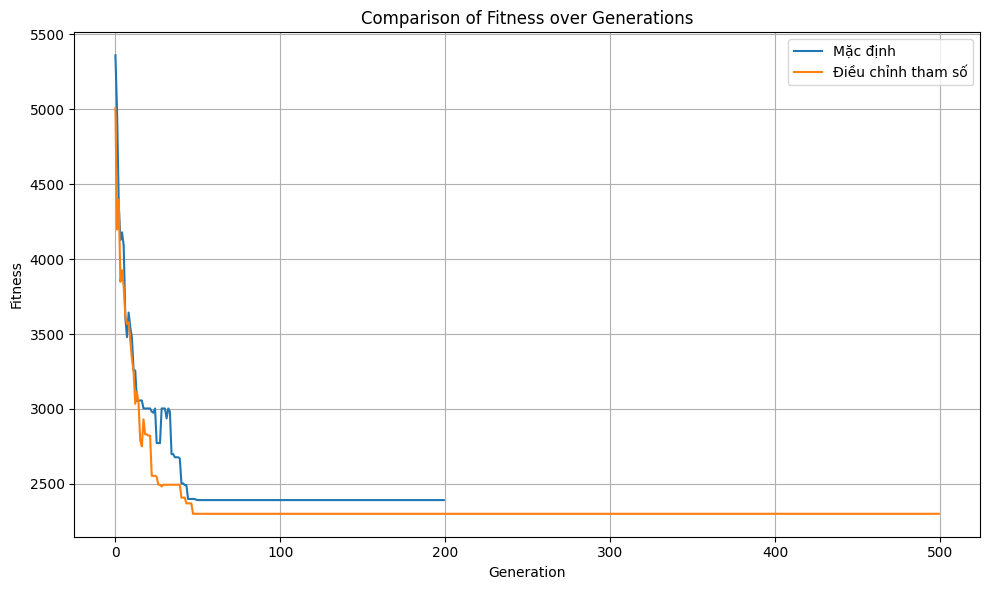

In [84]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(resultT2['fitness_history'], label='Mặc định')

# Vẽ fitness của result2
plt.plot(resultT22['fitness_history'], label='Điều chỉnh tham số')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Việc tinh chỉnh nhẹ các tham số như mutation rate, population size hoặc số thế hệ có mang lại cải thiện về chất lượng lời giải. 

    Điều chỉnh thuật toán


--- RESULTS for ../data/5_CentralRegion.csv ---
Best route : [1, 5, 6, 19, 7, 8, 9, 10, 16, 17, 18, 13, 12, 11, 15, 14, 4, 3, 2, 1]
Total dist : 2375.70 km
Time elapsed: 1.14 s


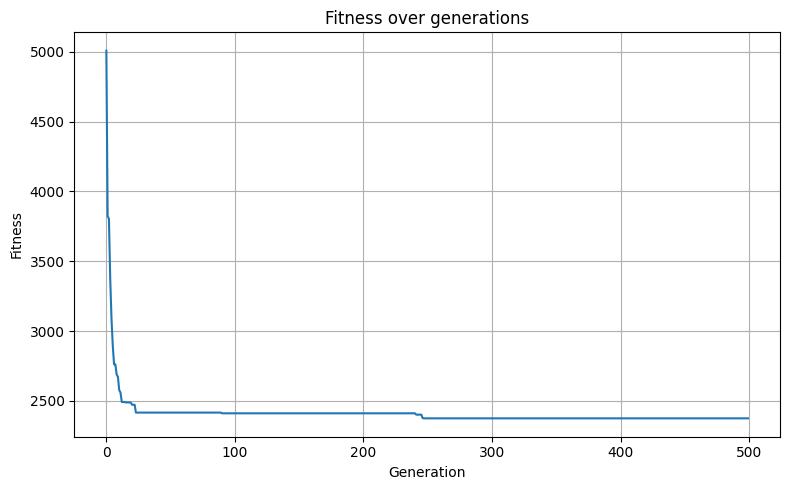

In [93]:
resultT222 = analyze_ga(
    "../data/5_CentralRegion.csv",
    population_size=250,
    generations=500,
    mutation_rate=0.03,
    selection_algorithm='rank',
    crossover_algorithm='order',
)

**Kết luận:**
- Tournament selection + Single-point crossover + Swap mutation với pop_size=100, generations=200, mutation_rate=0.01 hội tụ rất nhanh nhưng dễ kẹt ở nghiệm cục bộ, cho kết quả chưa thực sự tối ưu.
- Ở nhóm trung bình, cần thay đổi tham số tốt hơn
- Dù có thay dổi tổ hợp thuật toán thì kết quả cũng không tốt hơn, chứng tỏ tổ hợp mặc định hiện đang là tối ưu đối với nhóm trung bình

## TRƯỜNG HỢP 3: NHÓM LỚN (25+ THÀNH PHỐ)


--- RESULTS for ../data/8_VietNam.csv ---
Best route : [1, 58, 50, 38, 63, 44, 3, 55, 54, 56, 24, 26, 49, 23, 46, 57, 21, 17, 10, 36, 11, 32, 16, 47, 40, 42, 31, 30, 6, 27, 41, 35, 18, 52, 22, 4, 60, 14, 37, 62, 25, 53, 2, 9, 34, 8, 43, 7, 5, 28, 61, 51, 19, 45, 48, 15, 39, 29, 59, 33, 12, 13, 20, 1]
Total dist : 11756.51 km
Time elapsed: 1.07 s


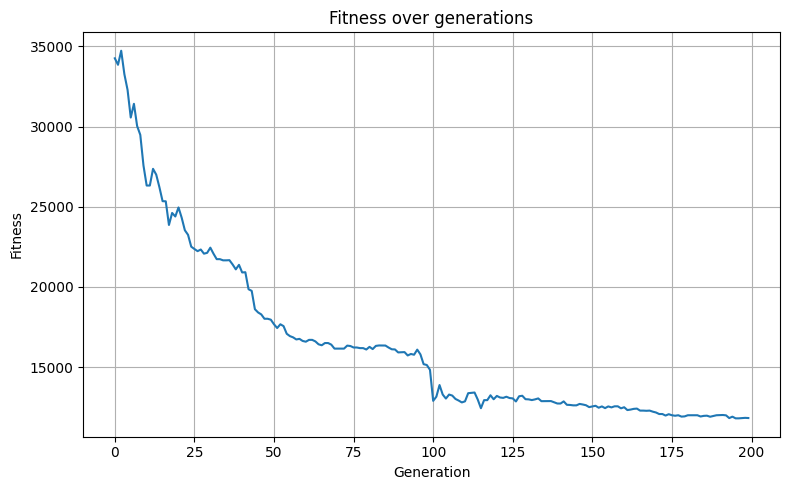

In [80]:
resultN3 = analyze_ga(
    "../data/8_VietNam.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)


--- RESULTS for ../data/8_VietNam.csv ---
Best route : [1, 20, 33, 12, 5, 51, 28, 13, 61, 59, 7, 58, 39, 29, 9, 53, 10, 36, 43, 32, 16, 21, 48, 47, 15, 57, 34, 17, 19, 2, 11, 45, 8, 50, 46, 25, 41, 56, 42, 23, 40, 54, 27, 49, 37, 55, 62, 24, 31, 26, 3, 6, 30, 44, 52, 18, 35, 38, 22, 14, 4, 60, 63, 1]
Total dist : 6584.81 km
Time elapsed: 105.87 s


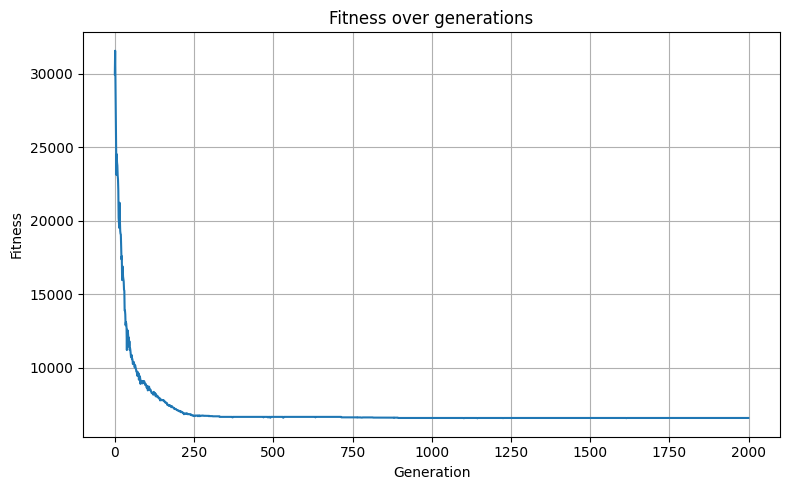

In [81]:
resultN33 = analyze_ga(
    "../data/8_VietNam.csv",
    population_size=700,
    generations=2000,
    mutation_rate=0.01
)

- Thuật toán GA bắt đầu với giá trị fitness rất cao (tổng khoảng cách lớn), thể hiện lời giải ban đầu kém.
- Fitness giảm nhanh trong khoảng vài trăm thế hệ đầu, phản ánh quá trình tối ưu hiệu quả, thuật toán tìm được các giải pháp tốt hơn.
- Sau khoảng thế hệ 250, fitness gần như ổn định quanh mức ~6,000, cho thấy thuật toán đã hội tụ và không còn cải thiện đáng kể nữa.
- Tăng đáng kể pop size và gen giúp tìm ra đường đi ngắn hơn đáng kể.


--- RESULTS for ../data/8_VietNam.csv ---
Best route : [1, 20, 33, 12, 5, 51, 28, 13, 61, 59, 7, 58, 39, 29, 9, 53, 10, 36, 43, 32, 16, 21, 48, 47, 15, 57, 34, 17, 19, 2, 11, 45, 8, 50, 46, 25, 41, 56, 42, 23, 40, 54, 27, 49, 37, 55, 62, 24, 31, 26, 3, 6, 30, 44, 52, 18, 35, 38, 22, 14, 4, 60, 63, 1]
Total dist : 6584.81 km
Time elapsed: 69.18 s


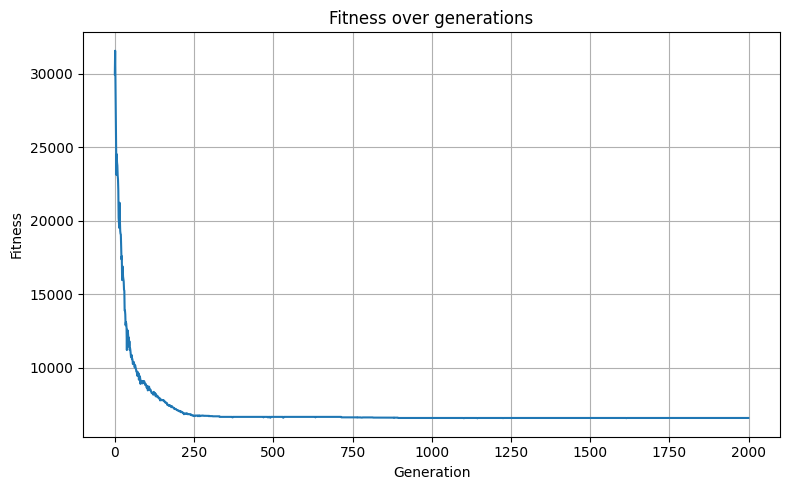

In [97]:
resultN333 = analyze_ga(
    "../data/8_VietNam.csv",
    population_size=700,
    generations=2000,
    mutation_rate=0.01,
    crossover_algorithm='order'
)

Việc thay đổi thuật toán tuy có thời gian chạy tốt hơn nhưng không đem lại kết quả tốt hơn.